# Basic sampler example: Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

import tinyDA as tda

### Defining the true model and generating some data

In [2]:
b = 1 # intercept
m = 2 # slope
x = np.linspace(0,1) # support
y_pure = b + m*x # clean output

sigma = 0.2 # standard deviation of the noise
y = y_pure + np.random.normal(scale=sigma, size=x.shape[0]) # noisy data

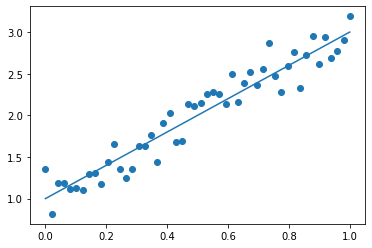

In [3]:
# plot it!
plt.plot(x, y_pure)
plt.scatter(x, y)
plt.show()

### Set up the statistical model

In [4]:
# set the prior
mean_prior = np.zeros(2)
cov_prior = np.eye(2)
my_prior = multivariate_normal(mean_prior, cov_prior)

# set the likelihood
cov_likelihood = sigma**2*np.eye(x.shape[0])
my_loglike = tda.GaussianLogLike(y, cov_likelihood)

In [5]:
# define a model.
def my_model(parameters):
    return parameters[0] + parameters[1]*x

In [6]:
# initialise the LinkFactory
my_posterior = tda.Posterior(my_prior, my_loglike, my_model)

### Set up the proposal

In [7]:
# random walk Metropolis
rwmh_cov = np.eye(2)
rmwh_scaling = 0.1
rwmh_adaptive = True
my_proposal = tda.GaussianRandomWalk(C=rwmh_cov, scaling=rmwh_scaling, adaptive=rwmh_adaptive)

# preconditioned Crank-Nicolson
#pcn_scaling = 0.1
#pcn_adaptive = True
#my_proposal = tda.CrankNicolson(scaling=pcn_scaling, adaptive=pcn_adaptive)

# adaptive Metropolis
#am_cov = np.eye(2)
#am_t0 = 2000
#am_sd = 1
#am_epsilon = 1e-6
#my_proposal = tda.AdaptiveMetropolis(C0=am_cov, t0=am_t0, sd=am_sd, epsilon=am_epsilon)

### Sample

In [8]:
my_chains = tda.sample(my_posterior, my_proposal, iterations=12000, n_chains=2, force_sequential=True)

Sampling chain 1/2


Running chain, α = 0.27:  25%|██▋        | 2976/12000 [00:01<00:05, 1561.42it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Running chain, α = 0.27:  70%|███████▋   | 8453/12000 [00:05<00:02, 1609.42it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Running chain, α = 0.21: 100%|██████████| 12000/12000 [00:07<00:00, 1614.99it/s]


Sampling chain 2/2


Running chain, α = 0.30:  15%|█▋         | 1796/12000 [00:01<00:05, 1780.02it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Running chain, α = 0.33:  63%|██████▉    | 7511/12000 [00:04<00:02, 1681.19it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Running chain, α = 0.26: 100%|██████████| 12000/12000 [00:07<00:00, 1677.69it/s]


### Get some diagnostics

In [9]:
import arviz as az

In [10]:
idata = tda.to_inference_data(my_chains, burnin=2000)

/home/mikkel/venv/tinyda/lib/python3.8/site-packages/arviz/data/inference_data.py:146: UserWarning: qoi group is not defined in the InferenceData scheme
  warnings.warn(


In [11]:
az.summary(idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta_0,1.001,0.055,0.904,1.107,0.002,0.001,846.0,1534.0,1.0
theta_1,2.014,0.094,1.851,2.202,0.003,0.002,796.0,1260.0,1.0


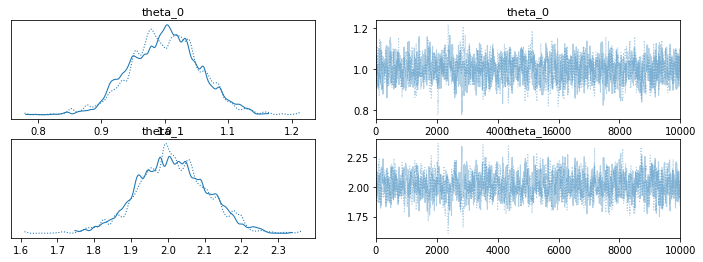

In [12]:
az.plot_trace(idata)
plt.show()